In [1]:
import os
from scipy.interpolate import griddata
from netCDF4 import Dataset
import pandas as pd
from osgeo import gdal, osr
import numpy as np


In [2]:
# def redefine_structured_grid(x,y,z):
#     min_x = np.nanmin(x)
#     min_y = np.nanmin(y)
#     max_x = np.nanmax(x)
#     max_y = np.nanmax(y)
#     xx = np.linspace(min_x, max_x, x.shape[1])
#     yy = np.linspace(min_y, max_y, y.shape[0])
#     x_new, y_new = np.meshgrid(xx,yy)
#     z_new = griddata((x.flatten(), y.flatten()), z.flatten(), (x_new, y_new), method='nearest', fill_value=0)
#     return x_new, y_new, z_new

In [3]:
def create_whale_array(species_filename, x, y, variable='percent', latlon=False):
    # if ((receptor_filename is not None) or (not receptor_filename == "")):
    if not((species_filename is None) or (species_filename == "")):
        if species_filename.endswith('.tif'):
            data = gdal.Open(species_filename)
            img = data.GetRasterBand(1)
            receptor_array = img.ReadAsArray()
            receptor_array[receptor_array < 0] = 0
            (upper_left_x, x_size, x_rotation, upper_left_y, y_rotation, y_size) = data.GetGeoTransform()
            cols = data.RasterXSize
            rows = data.RasterYSize
            r_rows = np.arange(rows) * y_size + upper_left_y + (y_size / 2)
            r_cols = np.arange(cols) * x_size + upper_left_x + (x_size / 2)
            if latlon==True:
                r_cols = np.where(r_cols<0, r_cols+360, r_cols)
            x_grid, y_grid = np.meshgrid(r_cols, r_rows)
            variable_array = griddata((x_grid.flatten(), y_grid.flatten()), receptor_array.flatten(), (x,y), method='nearest', fill_value=0)

        elif species_filename.endswith('.csv'):
            df = pd.read_csv(species_filename) 
            columns_keep = ['latitude', 'longitude', variable]
            df = df[columns_keep]
            variable_array = griddata((df.longitude.to_numpy(), df.latitude.to_numpy()), df[variable].to_numpy(), (x,y), method='nearest', fill_value=0)
        else:
            raise Exception("Invalid File Type. Must be of type .tif or .csv")
    else:
        # taucrit without a receptor
        #Assume the following grain sizes and conditions for typical beach sand (Nielsen, 1992 p.108)
        variable_array = np.ones(x.shape)
    return variable_array

In [4]:
paracousti_path = r"H:\Projects\C1308_SEAT\SEAT_inputs\plugin-input\Paracousti_files\Device_Present"
paracousti_files = [os.path.join(paracousti_path, i) for i in os.listdir(paracousti_path) if i.endswith('.nc')]
species_probability_path = r"H:\Projects\C1308_SEAT\Acoustics\Output\Whales"
threshold_file = r"H:\Projects\C1308_SEAT\SEAT_inputs\plugin-input\DEMO paracousti\receptor\Acoustic_Receptor.csv"
boundary_condition_file = r"H:\Projects\C1308_SEAT\SEAT_inputs\plugin-input\DEMO paracousti\Probability\boundary_conditions.csv"

In [5]:
boundary_conditions = pd.read_csv(boundary_condition_file).set_index('Paracousti File').fillna(0)
boundary_conditions['Paracousti Percent Occurance'] = 100 * (boundary_conditions['Paracousti Percent Occurance']/ boundary_conditions['Paracousti Percent Occurance'].sum())
boundary_conditions

,Species Percent Occurance File,Species Density File,Paracousti Percent Occurance
Paracousti File,,,
PacWave_3DSPLs_Hw0.5.nc,WhaleWatchPredictions_2021_01.csv,WhaleWatchPredictions_2021_01.csv,0.000000
PacWave_3DSPLs_Hw1.0.nc,WhaleWatchPredictions_2021_02.csv,WhaleWatchPredictions_2021_02.csv,2.737431
PacWave_3DSPLs_Hw1.5.nc,WhaleWatchPredictions_2021_03.csv,WhaleWatchPredictions_2021_03.csv,20.330618
PacWave_3DSPLs_Hw2.0.nc,WhaleWatchPredictions_2021_04.csv,WhaleWatchPredictions_2021_04.csv,39.891867
PacWave_3DSPLs_Hw2.5.nc,WhaleWatchPredictions_2021_05.csv,WhaleWatchPredictions_2021_05.csv,13.310998
PacWave_3DSPLs_Hw3.0.nc,WhaleWatchPredictions_2021_06.csv,WhaleWatchPredictions_2021_06.csv,3.500782
PacWave_3DSPLs_Hw3.5.nc,WhaleWatchPredictions_2021_07.csv,WhaleWatchPredictions_2021_07.csv,11.246640
PacWave_3DSPLs_Hw4.0.nc,WhaleWatchPredictions_2021_08.csv,WhaleWatchPredictions_2021_08.csv,0.594832
PacWave_3DSPLs_Hw4.5.nc,WhaleWatchPredictions_2021_09.csv,WhaleWatchPredictions_2021_09.csv,1.818601


In [6]:
np.sum(boundary_conditions['Paracousti Percent Occurance'])

100.0

In [7]:
species_thresholds = pd.read_csv(threshold_file, index_col=0, header=None).T
species_thresholds

,species,Paracousti Variable,Threshold (dB re 1uPa),Depth Averaging
1,Blue Whale,totSPL,219,DepthMax


In [8]:
Threshold = species_thresholds['Threshold (dB re 1uPa)'].astype(float).to_numpy().item()
Averaging = species_thresholds['Depth Averaging'].values.item()
variable = species_thresholds['Paracousti Variable'].values.item()


In [9]:
for ic, paracousti_file in enumerate(paracousti_files):
    ds = Dataset(paracousti_file)
    spl = ds.variables[variable][:].data
    cords = ds.variables[variable].coordinates.split()
    X = ds.variables[cords[0]][:].data
    Y = ds.variables[cords[1]][:].data
    import numpy as np
    if X.shape[0] != spl.shape[0]:
        spl = np.transpose(spl, (1, 2, 0))
    if ic==0:
        xunits = ds.variables['XCOR'].units
        if 'degrees' in xunits:
            XCOR = np.where(X<0, X+360, X)
        else:
            XCOR = X
        YCOR = Y
        SPL = np.zeros((len(paracousti_files), np.shape(spl)[0], np.shape(spl)[1], np.shape(spl)[2]))
    SPL[ic,:] = spl

In [10]:
if Averaging == 'DepthMax':
    SPL = np.nanmax(SPL, axis=3)
elif Averaging == 'DepthAverage':
    SPL = np.nanmean(SPL, axis=3)
elif Averaging == 'Bottom':
    SPL = SPL[:,:,-1]
elif Averaging == 'Top':
    SPL = SPL[:,:,0]
else:
    SPL = np.nanmax(SPL, axis=3)


C:\Users\local_tnelson76\Temp\ipykernel_31080\2289536312.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(XCOR,YCOR,SPL[0,:])


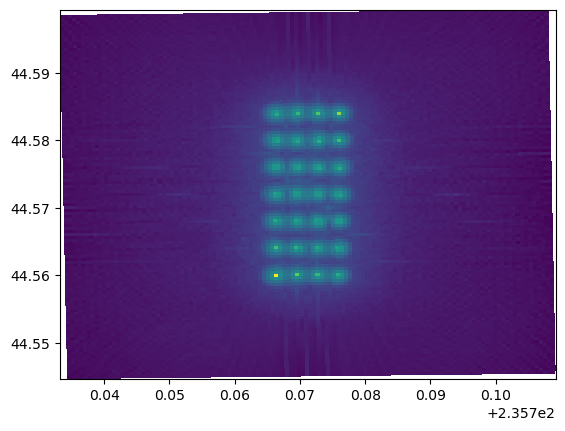

In [11]:
import matplotlib.pyplot as plt 
fig,ax = plt.subplots()
ax.pcolormesh(XCOR,YCOR,SPL[0,:])

In [12]:
threshold_scale = 0.5

stressor = np.zeros(XCOR.shape)
species_percent_occurance = np.zeros(XCOR.shape)
species_density = np.zeros(XCOR.shape)
threshold_time_exceeded = np.zeros(XCOR.shape)
percent_impacted = np.zeros(XCOR.shape)
density_impacted = np.zeros(XCOR.shape)
for ic, file in enumerate(paracousti_files):
    paracousti_file = os.path.basename(file)
    probability = boundary_conditions.loc[os.path.basename(paracousti_file)]['Paracousti Percent Occurance'] / 100
    stressor = stressor + probability * SPL[ic,:]

    species_percent_filename = boundary_conditions.loc[os.path.basename(paracousti_file)]['Species Percent Occurance File']
    species_density_filename = boundary_conditions.loc[os.path.basename(paracousti_file)]['Species Density File']
    parray = create_whale_array(os.path.join(species_probability_path, species_percent_filename), XCOR, YCOR, variable='percent', latlon=True)
    darray = create_whale_array(os.path.join(species_probability_path, species_density_filename), XCOR, YCOR, variable='density', latlon=True)

    species_percent_occurance = species_percent_occurance + probability * parray
    species_density = species_density + probability * darray

    threshold_mask = SPL[ic,:]>Threshold*threshold_scale
    threshold_time_exceeded[threshold_mask] += probability*100#np.flatnonzero(threshold_mask, threshold_time_exceeded+probability, threshold_exceeded)
    percent_impacted[threshold_mask] += probability * parray[threshold_mask]
    density_impacted[threshold_mask] += probability * darray[threshold_mask]

Threshold_Exceeded = np.where(stressor > Threshold*threshold_scale, 1, 0)
Percent_Impacted = np.where(Threshold_Exceeded == 1, species_percent_occurance, 0)
Density_Impacted = np.where(Threshold_Exceeded == 1, species_density, 0)


In [13]:
titles= ['Stressor', 'Threshold\nExceeded', 'Likelyhood\nPresent', 'Density\nImpacted']


C:\Users\local_tnelson76\Temp\ipykernel_31080\447580838.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  h0 = ax[0].pcolormesh(XCOR-360,YCOR,stressor, vmin=np.nanmin(stressor), vmax=np.nanmax(stressor))
C:\Users\local_tnelson76\Temp\ipykernel_31080\447580838.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  h1 = ax[1].pcolormesh(XCOR-360,YCOR,threshold_time_exceeded*100, vmin=0, vmax=100)
C:\Users\local_tnelson76\Temp\ipykernel_31080\447580838.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreas

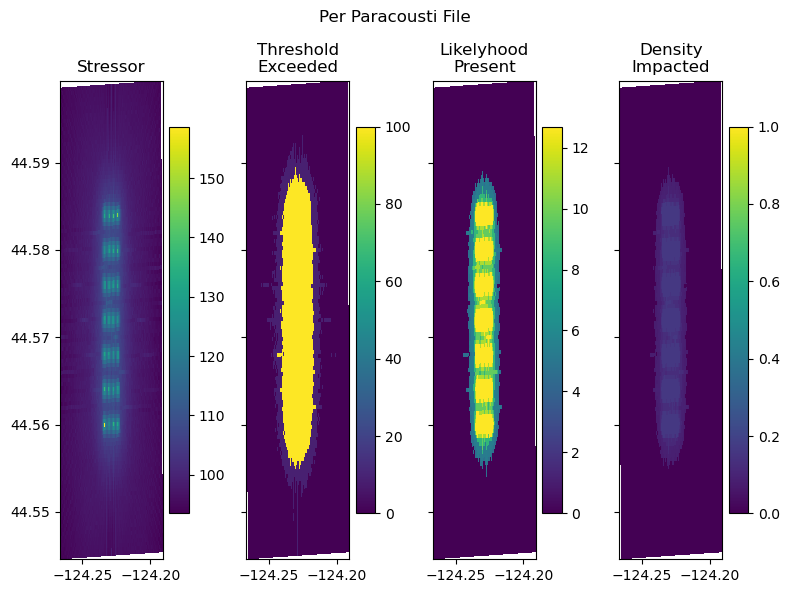

In [14]:

fig,ax = plt.subplots(ncols=4, figsize=(8,6))
h0 = ax[0].pcolormesh(XCOR-360,YCOR,stressor, vmin=np.nanmin(stressor), vmax=np.nanmax(stressor))
h1 = ax[1].pcolormesh(XCOR-360,YCOR,threshold_time_exceeded*100, vmin=0, vmax=100)
h2 = ax[2].pcolormesh(XCOR-360,YCOR,percent_impacted, vmin=0, vmax=np.nanmax(percent_impacted))
h3 = ax[3].pcolormesh(XCOR-360,YCOR,density_impacted, vmin=0, vmax=np.ceil(np.nanmax(density_impacted)))
plt.colorbar(h0, ax=ax[0])
plt.colorbar(h1, ax=ax[1])
plt.colorbar(h2, ax=ax[2])
plt.colorbar(h3, ax=ax[-1])
for axis in ax[1:]:
    axis.set_yticklabels('')
for axis, title in zip(ax, titles):
    axis.set_title(title)
fig.suptitle('Per Paracousti File')
fig.tight_layout()

C:\Users\local_tnelson76\Temp\ipykernel_31080\3586283449.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  h0 = ax[0].pcolormesh(XCOR-360,YCOR,stressor, vmin=np.nanmin(stressor), vmax=np.nanmax(stressor))
C:\Users\local_tnelson76\Temp\ipykernel_31080\3586283449.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  h1 = ax[1].pcolormesh(XCOR-360,YCOR,Threshold_Exceeded, vmin=0, vmax=1)
C:\Users\local_tnelson76\Temp\ipykernel_31080\3586283449.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. Thi

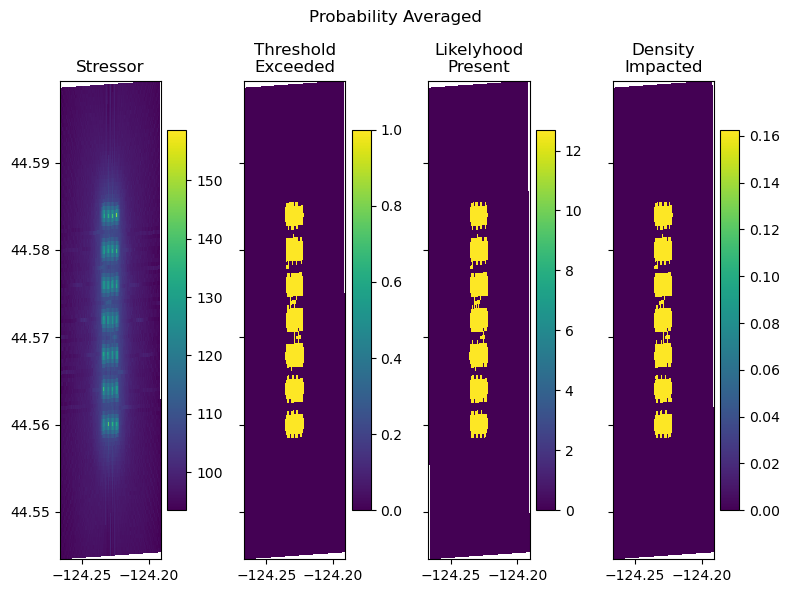

In [15]:
fig,ax = plt.subplots(ncols=4, figsize=(8,6))
h0 = ax[0].pcolormesh(XCOR-360,YCOR,stressor, vmin=np.nanmin(stressor), vmax=np.nanmax(stressor))
h1 = ax[1].pcolormesh(XCOR-360,YCOR,Threshold_Exceeded, vmin=0, vmax=1)
h2 = ax[2].pcolormesh(XCOR-360,YCOR,Percent_Impacted, vmin=0, vmax=np.nanmax(Percent_Impacted))
h3 = ax[3].pcolormesh(XCOR-360,YCOR,Density_Impacted, vmin=0, vmax=np.nanmax(Density_Impacted))
plt.colorbar(h0, ax=ax[0])
plt.colorbar(h1, ax=ax[1])
plt.colorbar(h2, ax=ax[2])
plt.colorbar(h3, ax=ax[-1])
for axis in ax[1:]:
    axis.set_yticklabels('')
for axis, title in zip(ax, titles):
    axis.set_title(title)
fig.suptitle('Probability Averaged')
fig.tight_layout()


C:\Users\local_tnelson76\Temp\ipykernel_31080\3242403917.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  h0 = ax[0].pcolormesh(XCOR,YCOR,SPL[0,:], vmin=np.nanmin(stressor), vmax=np.nanmax(stressor))
C:\Users\local_tnelson76\Temp\ipykernel_31080\3242403917.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  h1 = ax[1].pcolormesh(XCOR,YCOR,stressor, vmin=np.nanmin(stressor), vmax=np.nanmax(stressor))
C:\Users\local_tnelson76\Temp\ipykernel_31080\3242403917.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing 

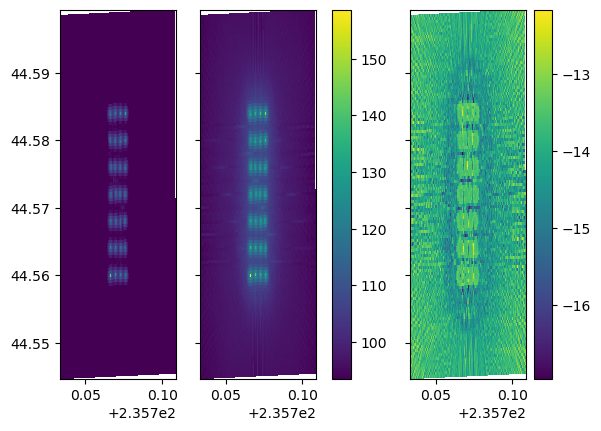

In [16]:
fig,ax = plt.subplots(ncols=3)
h0 = ax[0].pcolormesh(XCOR,YCOR,SPL[0,:], vmin=np.nanmin(stressor), vmax=np.nanmax(stressor))
h1 = ax[1].pcolormesh(XCOR,YCOR,stressor, vmin=np.nanmin(stressor), vmax=np.nanmax(stressor))
h2 = ax[2].pcolormesh(XCOR,YCOR,SPL[0,:] - stressor)
plt.colorbar(h0, ax=ax[0:2])
plt.colorbar(h2, ax=ax[-1])
for axis in ax[1:]:
    axis.set_yticklabels('')


In [17]:
# Create stressor above threshold for each paracousti
# Create cumulative probability of whale present and impacted 
# Create total number of whales potentially impacted

In [161]:
xn, yn, zn = redefine_structured_grid(XCOR,YCOR,stressor)

In [168]:
def redefine_structured_grid(x,y,z):
    min_x = np.nanmin(x)
    min_y = np.nanmin(y)
    max_x = np.nanmax(x)
    max_y = np.nanmax(y)
    xx = np.linspace(min_x, max_x, x.shape[1])
    yy = np.linspace(min_y, max_y, y.shape[0])
    dx = np.nanmin([np.nanmedian(xx), np.nanmedian(yy)])
    xx = np.arange(min_x, max_x+dx, dx)
    yy = np.arange(min_y, max_y+dx, dx)
    x_new, y_new = np.meshgrid(xx,yy)
    z_new = griddata((x.flatten(), y.flatten()), z.flatten(), (x_new, y_new), method='nearest', fill_value=0)
    return x_new, y_new, z_new

In [201]:
x = XCOR
y = YCOR

min_x = np.nanmin(x)
min_y = np.nanmin(y)
max_x = np.nanmax(x)
max_y = np.nanmax(y)
xx = np.linspace(min_x, max_x, x.shape[1])
yy = np.linspace(min_y, max_y, y.shape[0])
dx = np.nanmin([np.nanmedian(np.diff(xx)), np.nanmedian(np.diff(yy))])
xx = np.arange(min_x, max_x+dx, dx)
yy = np.arange(min_y, max_y+dx, dx)
x_new, y_new = np.meshgrid(xx,yy)
# z_new = griddata((x.flatten(), y.flatten()), z.flatten(), (x_new, y_new), method='nearest', fill_value=0)

In [208]:
np.nanmean(np.diff(x_new[0,:]))

0.00045673787093392093

In [210]:
np.nanmean(np.diff(y_new[:,0]))

0.0004567378709268155

In [207]:
np.nanmean(np.diff(x_new[0,:])) == np.nanmean(np.diff(y_new[:,0]))

False

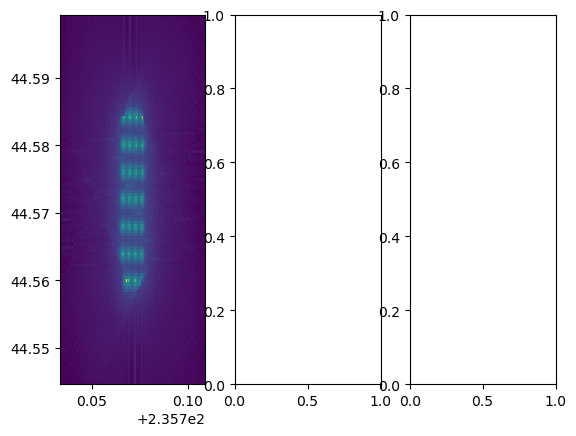

In [162]:
fig,ax = plt.subplots(ncols=3)
h0 = ax[0].pcolormesh(xn, yn, zn)

In [22]:
from stressor_utils import redefine_structured_grid
rx, ry, stressor = redefine_structured_grid(XCOR, YCOR, stressor)
dx = np.nanmean(np.diff(rx[0,:]))
dy = np.nanmean(np.diff(ry[:,0]))
rx

array([[235.73345947, 235.73409853, 235.73473759, ..., 235.80759029,
        235.80822935, 235.80886841],
       [235.73345947, 235.73409853, 235.73473759, ..., 235.80759029,
        235.80822935, 235.80886841],
       [235.73345947, 235.73409853, 235.73473759, ..., 235.80759029,
        235.80822935, 235.80886841],
       ...,
       [235.73345947, 235.73409853, 235.73473759, ..., 235.80759029,
        235.80822935, 235.80886841],
       [235.73345947, 235.73409853, 235.73473759, ..., 235.80759029,
        235.80822935, 235.80886841],
       [235.73345947, 235.73409853, 235.73473759, ..., 235.80759029,
        235.80822935, 235.80886841]])

In [127]:
def calculate_grid_sqarea_latlon2m(rx, ry):
    import numpy as np
    from pyproj import Geod

    geod = Geod(ellps="WGS84")
    rxx = np.where(rx>180, rx-360, rx)
    lon2D,lat2D = rxx, ry
    _,_, distEW = geod.inv(lon2D[:,:-1],lat2D[:,1:], lon2D[:,1:], lat2D[:,1:])
    _,_, distNS = geod.inv(lon2D[1:,:],lat2D[1:,:], lon2D[1:,:], lat2D[:-1,:])
    square_area = distEW[1:,:] * distNS[:,1:]
    np.nanmean(square_area)
    rxm = np.zeros(square_area.shape)
    rym = np.zeros(square_area.shape)
    for row in range(rx.shape[0]-1):
        rxm[row,:] = (rx[row,:-1]+ rx[row,1:])/2
    for col in range(ry.shape[1]-1):
        rym[:,col] = (ry[:-1,col]+ ry[1:,col])/2
    return rxm, rym, square_area, np.nanmean(square_area)

In [154]:
(50*50) / (625*1.0e6)

4e-06

In [152]:
rxm[0:8,0:8]

array([[44.5450358 , 44.5450358 , 44.5450358 , 44.5450358 , 44.5450358 ,
        44.5450358 , 44.5450358 , 44.5450358 ],
       [44.54549254, 44.54549254, 44.54549254, 44.54549254, 44.54549254,
        44.54549254, 44.54549254, 44.54549254],
       [44.54594928, 44.54594928, 44.54594928, 44.54594928, 44.54594928,
        44.54594928, 44.54594928, 44.54594928],
       [44.54640602, 44.54640602, 44.54640602, 44.54640602, 44.54640602,
        44.54640602, 44.54640602, 44.54640602],
       [44.54686275, 44.54686275, 44.54686275, 44.54686275, 44.54686275,
        44.54686275, 44.54686275, 44.54686275],
       [44.54731949, 44.54731949, 44.54731949, 44.54731949, 44.54731949,
        44.54731949, 44.54731949, 44.54731949],
       [44.54777623, 44.54777623, 44.54777623, 44.54777623, 44.54777623,
        44.54777623, 44.54777623, 44.54777623],
       [44.54823297, 44.54823297, 44.54823297, 44.54823297, 44.54823297,
        44.54823297, 44.54823297, 44.54823297]])

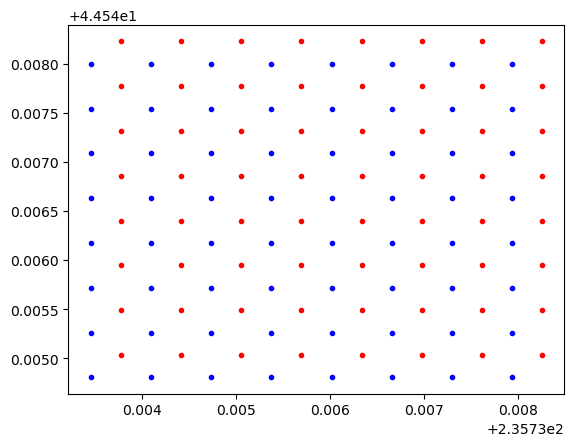

In [158]:
data = gdal.Open(r"H:\Projects\C1308_SEAT\SEAT_inputs\plugin-output\Demo_Acoustics\calculated_stressor.tif")
img = data.GetRasterBand(1)
receptor_array = img.ReadAsArray()
(upper_left_x, x_size, x_rotation, upper_left_y, y_rotation, y_size) = data.GetGeoTransform()
cols = data.RasterXSize
rows = data.RasterYSize
r_rows = np.arange(rows) * y_size + upper_left_y + (y_size / 2)
r_cols = np.arange(cols) * x_size + upper_left_x + (x_size / 2)
x_grid, y_grid = np.meshgrid(r_cols, r_rows)

In [160]:
x_grid

array([[-124.26654053, -124.26654053, -124.26654053, ..., -124.26654053,
        -124.26654053, -124.26654053],
       [-124.26654053, -124.26654053, -124.26654053, ..., -124.26654053,
        -124.26654053, -124.26654053],
       [-124.26654053, -124.26654053, -124.26654053, ..., -124.26654053,
        -124.26654053, -124.26654053],
       ...,
       [-124.26654053, -124.26654053, -124.26654053, ..., -124.26654053,
        -124.26654053, -124.26654053],
       [-124.26654053, -124.26654053, -124.26654053, ..., -124.26654053,
        -124.26654053, -124.26654053],
       [-124.26654053, -124.26654053, -124.26654053, ..., -124.26654053,
        -124.26654053, -124.26654053]])